In [1]:
#word2vec
# 100B words - google news dataset
# 3 million words, each word has 300 features

In [2]:
!pip install gdown --upgrade 
 # Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1
Downloading...
From (uriginal): https://drive.google.com/uc?id=17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1
From (redirected): https://drive.google.com/uc?id=17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1&confirm=t&uuid=698af32b-763f-4aff-98ce-59aeb9c208ee
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:38<00:00, 43.2MB/s]


In [3]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [7]:
# gensim
import gensim

model_path = "/content/GoogleNews-vectors-negative300.bin"

model = gensim.models.KeyedVectors.load_word2vec_format(model_path,
                                                         binary=True)

In [13]:
from random import choice
vocab = list(model.key_to_index.keys()) # list of vocabulary
print(vocab[:5])


['</s>', 'in', 'for', 'that', 'is']


In [14]:
len(vocab) # 3 million

3000000

In [15]:
for i in range(10):
  print(choice(vocab))

Angela_Doland
successfully_commercialize_Silenor
thinnest_smartphone
Dr._Reuben_Abati
Neutersol
Tiyan_Guam
MTU_Inform
Adolfo_Valadez
Sachin_Ratti
Welbedacht


In [18]:
def check_vocab(vocab, check_words):
  print("%40s %s"%("Word","Present"))
  print("%40s %s"%("------","------"))

  for word in check_words:
    print("%40s  %s"%(word, word in model.key_to_index))

    if not word.lower() == word:
      print("%40s  %s"%(word, word.lower() in model.key_to_index))


In [21]:
check_vocab(vocab, ['Narendra','trump','data','machine','NLP'])

                                    Word Present
                                  ------ ------
                                Narendra  True
                                Narendra  False
                                   trump  True
                                    data  True
                                 machine  True
                                     NLP  True
                                     NLP  False


In [22]:
check_vocab(vocab, ['Narendra_modi','donald_trump','united_states','united_kingdom'])

                                    Word Present
                                  ------ ------
                           Narendra_modi  False
                           Narendra_modi  False
                            donald_trump  True
                           united_states  False
                          united_kingdom  False


In [23]:
check_vocab(vocab, ['Narendra_Modi','Donald_Trump','United_States','United_Kingdom'])

                                    Word Present
                                  ------ ------
                           Narendra_Modi  True
                           Narendra_Modi  False
                            Donald_Trump  True
                            Donald_Trump  True
                           United_States  True
                           United_States  False
                          United_Kingdom  True
                          United_Kingdom  False


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

vector = model.word_vec("Narendra_Modi")
print(vector.shape)

(300,)


<ipython-input-24-83c34eef923e>:5: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vector = model.word_vec("Narendra_Modi")


In [25]:
vector

array([ 2.42187500e-01,  2.28515625e-01,  3.43750000e-01,  5.31250000e-01,
       -3.41796875e-01, -3.71093750e-01, -1.72851562e-01,  1.43554688e-01,
        1.07421875e-01,  4.95605469e-02,  2.02636719e-02, -1.25976562e-01,
       -3.08593750e-01, -9.46044922e-03, -1.79687500e-01,  2.55859375e-01,
       -6.54296875e-02, -2.53906250e-01, -4.88281250e-02,  8.59375000e-02,
        3.82812500e-01,  1.40625000e-01,  1.35742188e-01, -6.00585938e-02,
       -1.85546875e-01,  1.56250000e-01, -9.57031250e-02, -2.89062500e-01,
        5.15625000e-01,  3.18908691e-03, -2.50000000e-01, -1.73828125e-01,
       -3.30078125e-01,  5.35156250e-01, -2.49023438e-01,  3.47656250e-01,
       -2.04101562e-01, -2.04101562e-01,  3.76953125e-01, -5.68847656e-02,
        4.25781250e-01, -6.25000000e-02,  3.08593750e-01,  4.49218750e-01,
        2.37304688e-01, -4.60937500e-01, -1.67968750e-01,  1.08886719e-01,
       -6.65283203e-03,  1.37695312e-01, -6.88476562e-02,  1.31835938e-01,
        2.96875000e-01, -

In [26]:
print(f"Magnitude of a vector is {np.linalg.norm(vector)}")

Magnitude of a vector is 4.041469573974609


<ipython-input-27-dff8840bb8c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vector, kde=False, rug=True)


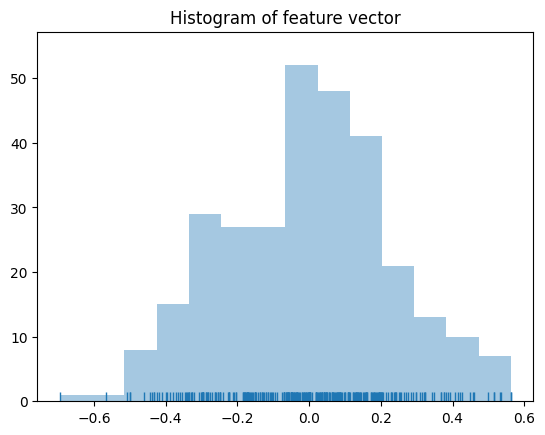

In [27]:
sns.distplot(vector, kde=False, rug=True)
plt.title("Histogram of feature vector")
plt.show()

# Simialarity between the words

In [28]:
word1 = 'bread'
word2 = 'jam'
score = model.similarity(word1,word2)
print(f"cosine similarity between {word1} & {word2} is {score}")

cosine similarity between bread & jam is 0.22019492089748383


In [29]:
word1 = 'bread'
word2 = 'butter'
score = model.similarity(word1,word2)
print(f"cosine similarity between {word1} & {word2} is {score}")

cosine similarity between bread & butter is 0.6417260766029358


In [30]:
word1 = 'cycle'
word2 = 'bicycle'
score = model.similarity(word1,word2)
print(f"cosine similarity between {word1} & {word2} is {score}")

cosine similarity between cycle & bicycle is 0.16222114861011505


In [31]:
word1 = 'couch'
word2 = 'sofa'
score = model.similarity(word1,word2)
print(f"cosine similarity between {word1} & {word2} is {score}")

cosine similarity between couch & sofa is 0.8309178948402405


In [32]:
# max = 1, min = -1

# Most Similar words

In [33]:
word = "sofa"
results = model.most_similar(positive=word, topn=10)
print(results)

[('couch', 0.8309177756309509), ('settee', 0.7764685750007629), ('sofas', 0.7543259859085083), ('loveseat', 0.7152645587921143), ('recliner', 0.7101271152496338), ('futon', 0.6624690890312195), ('leather_sofa', 0.6620596051216125), ('plush_sofa', 0.6556485295295715), ('ottoman', 0.6525835394859314), ('couches', 0.6501914262771606)]


# How to calculate the similarity score between two words

In [34]:
# cos(x,y) = x.y/mag(x)*(mag(y))

In [35]:
matrix = model.vectors
print("shape of matrix is",matrix.shape)

shape of matrix is (3000000, 300)


In [37]:
w1 = model.key_to_index['bread']
w2 = model.key_to_index['butter']

v1 = model.vectors[w1]
v2 = model.vectors[w2]

print(f"Norm of bread is {np.linalg.norm(v1)}")
print(f"Norm of butter is {np.linalg.norm(v2)}")


Norm of bread is 2.960254192352295
Norm of butter is 3.1190855503082275


In [38]:
cos_sim = (np.dot(v1,v2))/(np.linalg.norm(v1)*np.linalg.norm(v2))
print(f'cosine similarity is {cos_sim}')

cosine similarity is 0.6417260766029358
